# Value at Risk Assessment Model

### Import Packages

In [2]:
!pip install yfinance
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 18.7 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

### Distributions - Set Up Stock Parameters

In [3]:
# Number of shares
shares_MSFT = 1000

# Live stock price
price = yf.Ticker('ABC')
price_MSFT = price.history().tail(1)['Close'].iloc[0]

print(price)
print('---------')
print(price_MSFT)

yfinance.Ticker object <ABC>
---------
148.8350067138672


In [4]:
# Investment value
value_MSFT = price_MSFT * shares_MSFT

# Risk free rate (4 week treasury bill rate)
rfr_MSFT = 0.02 

# Volatility (30-day volatility at that time)
vol_MSFT = 0.2116

### Simulations - Calculate Investment Returns

In [5]:
# Number of simulations
simulations = 5000 

# Investment time in a year
t_MSFT = 21/252 

(array([  1.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   1.,   2.,   0.,
          3.,   3.,   2.,   3.,   4.,   3.,   3.,  11.,   3.,  12.,  12.,
         16.,  17.,  17.,  27.,  20.,  23.,  35.,  34.,  49.,  50.,  45.,
         67.,  70.,  80.,  86., 116.,  92., 101., 130., 141., 119., 144.,
        136., 120., 145., 145., 163., 130., 143., 140., 155., 152., 162.,
        157., 147., 138., 112., 140.,  98., 118., 100.,  84.,  88.,  70.,
         66.,  61.,  65.,  64.,  44.,  36.,  45.,  23.,  31.,  27.,  13.,
         18.,  15.,  12.,  16.,  15.,  10.,   8.,   7.,   4.,   8.,   4.,
          5.,   7.,   2.,   1.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.86153281, -3.78561741, -3.70970201, -3.63378661, -3.55787121,
        -3.48195581, -3.40604041, -3.33012501, -3.25420961, -3.17829421,
        -3.10237882, -3.02646342, -2.95054802, -2.87463262, -2.79871722,
        -2.72280182, -2.64688642, -2.57097102, -2.49505562, -2.41914022,
        -2.34322482, -2.26

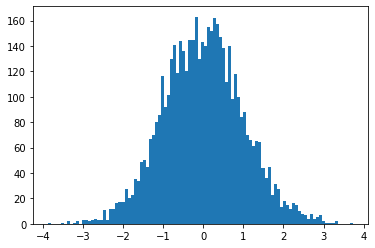

In [6]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample,bins=100)

In [7]:
print(np.mean(sample))
print(np.std(sample))

-0.0018834823733587499
0.997405208023458


In [8]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - .5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [9]:
# Print: VaR at x% confidence level: $y.

x = 0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x, y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-11,150
VaR at 95% confidence level: $-14,474
VaR at 99% confidence level: $-19,830


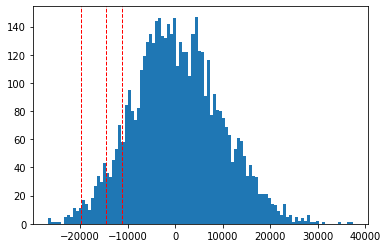

In [10]:
# Plot the returns
plt.hist(returns_MSFT, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_MSFT, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)